# EVAL Problem 1
In this EVAL assignment we will start to explore how to discover characteristics of incoming workload, we will dive into how to measure the overheads of our systems, and we will also study the properties how queues evolve in response to varying traffic conditions.


-----
a) First thing first, let’s try to make sense out of the workload that is coming from the client. You might recall that by invoking the client with various values of the `-a` and `-s` parameters significantly impacts
the load seen by your server. Now it is time to reverse-engineer the characteristics of that traffic. Start with the following to collect the report of 1,000 packets handled at the server:  

`./server_mt 2222 & ./client -a 6 -s 10 -n 1000 2222`  

Now, isolate only the lengths of the requests as they are sent from the client. With that, produce a plot of the distribution of the request lengths you have collected. The distribution plot should have on
the *x*-axis a set of time bins, e.g., from 0 (included) to 0.005 (excluded), from 0.005 (included) to 0.010 (excluded), and so on in steps of 0.005 increments. Given each transaction, look at its length. If it is in the range between 0.005 and 0.010 seconds, it falls in the second bin; if it is in the range between 0.010 and 0.015, it falls in the third bin and so on.  

On the *y*-axis, plot how many requests fall in each bin! But do not plot the raw count. Rather, normalize that value by the total number of requests you are plotting. In this case, 1,000. Hooray!
You have produced a distribution plot.

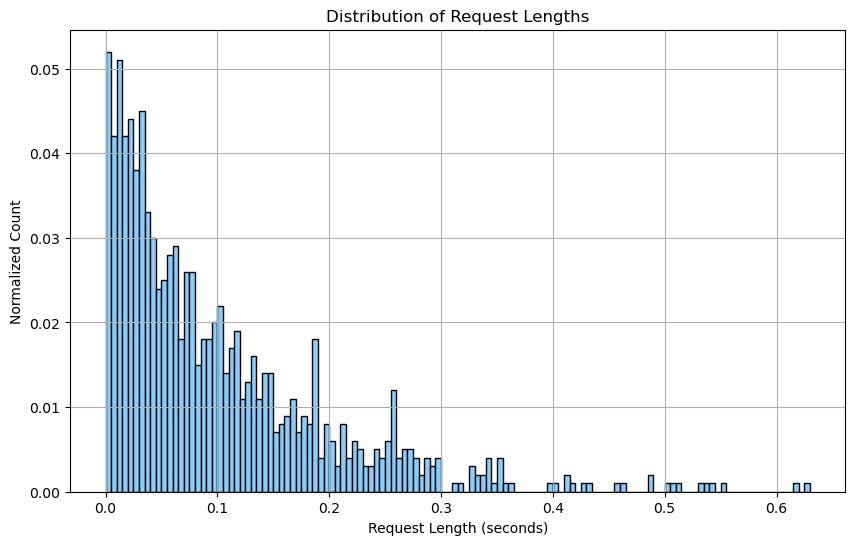

In [57]:
# Extract the request lengths from the output file
!grep "^R" ./EVAL1/output1.txt | awk -F',' '{print $2}' > ./EVAL1/req1.txt

import matplotlib.pyplot as plt
import numpy as np

# Read the request lengths from the extracted file
request_lengths = []
with open('./EVAL1/req1.txt', 'r') as file:
	for line in file:
		request_lengths.append(float(line.strip()))

# Define bins 
bin_size = 0.005
max_val = max(request_lengths) + bin_size
bins = np.arange(0, max_val, bin_size)

# Histogram
hist, bin_edges = np.histogram(request_lengths, bins=bins)

# Normalize by the total number of requests
hist_normalized = hist / 1000 #len(inter_arrival_times)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_normalized, width=bin_size, color="lightskyblue", edgecolor='black', align='edge')
plt.xlabel('Request Length (seconds)')
plt.ylabel('Normalized Count')
plt.title('Distribution of Request Lengths')
plt.xticks(np.arange(0, max(bin_edges), step=0.1))
plt.grid(True)

plt.show()


------
b) By using the same procedure used in the previous part, produce a distribution plot of the inter-arrival time between any two subsequent requests. Say that request $R0$ is sent (look at the sent timestamp!)
arrives at $t_0 = 10s$ and $R1$ is sent at $t_1 = 15s$, then the inter-arrival time between them is $t^{iat} 0,1 = (t_1−t_0)$.  

Compute all the 999 inter-arrival times you have observed and plot their distribution just like you did above, except that this time you will normalize by 999.

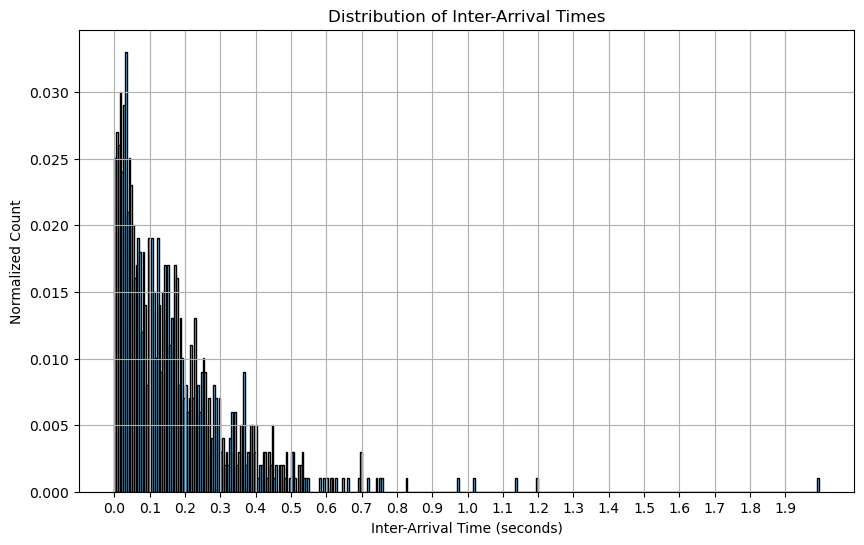

In [58]:
# Extract the sent_timestamps from the output file
!grep "^R" ./EVAL1/output2.txt | awk -F',' '{print $1}' | awk -F':' '{print $2}' > ./EVAL1/req2.txt

import matplotlib.pyplot as plt
import numpy as np

# Read sent timestamps from the file
sent_timestamps = []
with open('./EVAL1/req2.txt', 'r') as file:
	for line in file:
		sent_timestamps.append(float(line.strip()))

# Compute inter-arrival times
inter_arrival_times = []
for i in range(1, len(sent_timestamps)):
	inter_arrival_time = sent_timestamps[i] - sent_timestamps[i - 1]
	inter_arrival_times.append(inter_arrival_time)

# Define bins for inter-arrival times
bin_size = 0.005 
max_value = max(inter_arrival_times) + bin_size
bins = np.arange(0, max_value, bin_size)

# Histogram
hist, bin_edges = np.histogram(inter_arrival_times, bins=bins)

# Normalize by the total number of inter-arrival times (999)
hist_normalized = hist / 999 #len(inter_arrival_times)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_normalized, width=bin_size, color="lightskyblue", edgecolor='black', align='edge')
plt.xlabel('Inter-Arrival Time (seconds)')
plt.ylabel('Normalized Count')
plt.title('Distribution of Inter-Arrival Times')
plt.xticks(np.arange(0, max(bin_edges), step=0.1)) 
plt.grid(True)

plt.show()


-----
c) Time to reverse-engineer things! Let’s start from the distribution of request lengths. Use your favorite programming language to generate 10,000 samples from the following theoretical distributions:

1.  A Normal distribution with mean 1/10 and standard deviation 1.  
2.  An Exponential distribution with mean 1/10. 
3.  A uniform distribution with mean 1/10.  

Plot these distribution together (on the same plot, just different lines) with the distribution you previously acquired from your server run. Thus, your plot should have a total of 4 different lines (I suggest
having lines instead of bars for this plot) in it. Then, comment on which ones of the curves matches more closely with the experimental data. If there is one of them that matches remarkably close, you
have successfully reverse-engineered the characteristics of your input load!

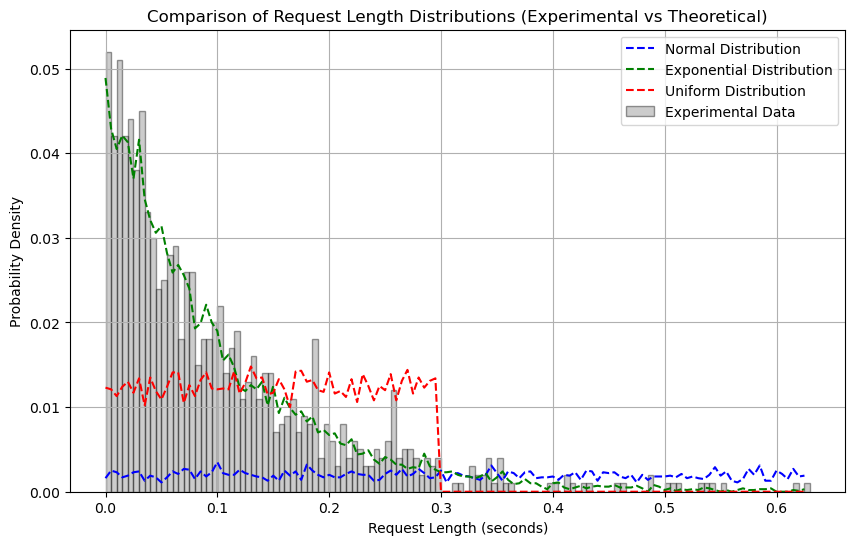

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples and mean value
num_samples = 10000
mean_value = 1/10

# Normal Distribution (mean = 1/10, stddev = 1)
normal_samples = np.random.normal(loc=mean_value, scale=1, size=num_samples)

# Exponential Distribution (mean = 1/10)
exponential_samples = np.random.exponential(scale=mean_value, size=num_samples)

# Uniform Distribution (mean = 1/10)
low = mean_value - (mean_value * 2)  # Setting the range for uniform distribution
high = mean_value + (mean_value * 2)
uniform_samples = np.random.uniform(low=low, high=high, size=num_samples)

# Load the experimental request lengths from part a
request_lengths = []
with open('./EVAL1/req1.txt', 'r') as file:
    for line in file:
        request_lengths.append(float(line.strip()))

# Define bins based on the maximum request length and the bin size
bin_size = 0.005
max_val = max(request_lengths) + bin_size
bins = np.arange(0, max_val, bin_size)

# Calculate histogram for experimental data (Normalized)
hist_experimental, _ = np.histogram(request_lengths, bins=bins)

# Calculate histograms for theoretical distributions
hist_normal, _ = np.histogram(normal_samples, bins=bins)
hist_exp, _ = np.histogram(exponential_samples, bins=bins)
hist_uniform, _ = np.histogram(uniform_samples, bins=bins)

# Plot the distributions
plt.figure(figsize=(10, 6))

# Plot experimental distribution (request lengths from server) as a bar chart
plt.bar(bins[:-1], hist_experimental / 1000, width=bin_size, edgecolor='black', align='edge', alpha=0.4, label='Experimental Data', color='gray')

# Plot theoretical distributions as lines
plt.plot(bins[:-1], hist_normal / 10000, label='Normal Distribution', color='blue', linestyle='--')
plt.plot(bins[:-1], hist_exp / 10000, label='Exponential Distribution', color='green', linestyle='--')
plt.plot(bins[:-1], hist_uniform / 10000, label='Uniform Distribution', color='red', linestyle='--')

# Customize the plot
plt.xlabel('Request Length (seconds)')
plt.ylabel('Probability Density')
plt.title('Comparison of Request Length Distributions (Experimental vs Theoretical)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, max(bins), step=0.1))

plt.show()

Based on this comparison, the **exponential distribution** best matches the experimental data. It models the heavy skew toward shorter request lengths and the rapid decline in frequency as the request length increases. The normal and uniform distributions both fail to adequately represent the behavior of the request lengths. The normal distribution does not capture the right-skewed nature of the data, and the uniform distribution is too simplistic, assuming equal likelihood for all request lengths, which is not supported by the data.

-----
d) Do the same with the inter-arrival times. But this time, compare it with the following three references:
1. A Normal distribution with mean 1/6 and standard deviation 1.
2. An Exponential distribution with mean 1/6.
3. A uniform distribution with mean 1/6.  

Produce the comparison plot and comment on the match between the experimental and theoretical curves. At this point, can you tell me what the `-a` and `-s` parameters control, exactly?

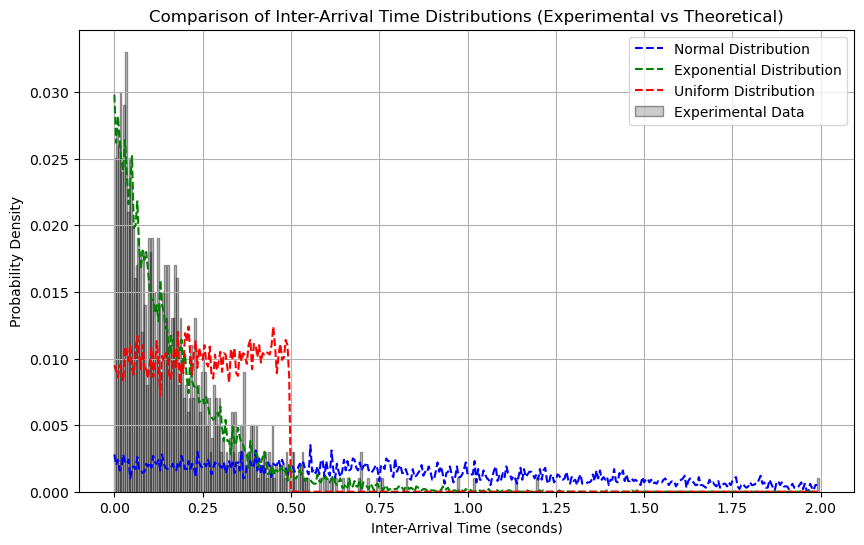

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Mean Value
num_samples = 10000
mean_value = 1/6

# Normal Distribution (mean = 1/6, stddev = 1)
normal_data = np.random.normal(loc=mean_value, scale=1, size=num_samples)

# Exponential Distribution (mean = 1/6)
exponential_data = np.random.exponential(scale=mean_value, size=num_samples)

# Uniform Distribution (mean = 1/6)
low = 0
high = mean_value + (mean_value * 2)
uniform_data = np.random.uniform(low=low, high=high, size=num_samples)

# Define bins based on inter-arrival times data
bin_size = 0.005
max_val = max(inter_arrival_times) + bin_size
bins = np.arange(0, max_val, bin_size)

# Calculate histogram for experimental data (Normalized)
hist_experimental, _ = np.histogram(inter_arrival_times, bins=bins)

# Calculate histograms for theoretical distributions
hist_normal, _ = np.histogram(normal_data, bins=bins)
hist_exp, _ = np.histogram(exponential_data, bins=bins)
hist_uniform, _ = np.histogram(uniform_data, bins=bins)

# Plot the distributions
plt.figure(figsize=(10, 6))

# Plot experimental distribution (inter-arrival times) as a bar chart
plt.bar(bins[:-1], hist_experimental / 999, width=bin_size, edgecolor='black', align='edge', alpha=0.4, label='Experimental Data', color='gray')

# Plot theoretical distributions as lines
plt.plot(bins[:-1], hist_normal / 9999, label='Normal Distribution', color='blue', linestyle='--')
plt.plot(bins[:-1], hist_exp / 9999, label='Exponential Distribution', color='green', linestyle='--')
plt.plot(bins[:-1], hist_uniform / 9999, label='Uniform Distribution', color='red', linestyle='--')

# Labels and title
plt.xlabel('Inter-Arrival Time (seconds)')
plt.ylabel('Probability Density')
plt.title('Comparison of Inter-Arrival Time Distributions (Experimental vs Theoretical)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The **exponential distribution** best matches the experimental data, indicating that the requests arrive at random, independent intervals consistent with a Poisson process. This would suggest that the `-a` parameter is controlling the arrival rate (affecting inter-arrival times), while the `-s` parameter is controlling the service or processing time (affecting request lengths).

-----
# EVAL Problem 2
In this EVAL problem, we will start to study the relationship between utilization, throughput, and queues in response to changing load conditions.

-----
a) First thing first, learn how to take a good queue size average. A good queue average measurement should consider the amount of time the queue remains in a certain state, i.e., it should be a timed average of the queue length.  

Let us make an example. Say that your queue at $t = 0$ has 3 elements in it, and it stays that way until time $t = 9$ sec, at which point the queue becomes empty. If you do not consider time, the average size would be $q = (3 + 0)/2 = 1.5$. But this is incorrect: most of the time we see the queue with 3 elements, and only at the end with 0. So an average of 1.5 seems wrong.  

The right way to take the average is by weighting the queue state by the time it stays in that state. Thus, the right way to calculate q in our example is $q = 3 · (\frac{9}{10} ) + 0 · (\frac{1}{10}) = 2.7$. You can see how this is a better average of queue size over a 10 seconds time window starting from time $t = 0$.  

Now, measure the queue length for the case where your queue-enabled server is invoked with the following parameters:  
`./server_q 2222 & ./client -a 14 -s 15 -n 1000 2222`  

Use the queue snapshots produced by the worker thread to measure the queue size as it was observed after each request was observed. Use the time elapsed between two subsequent queue snapshots to
weigh that size towards the total average.

In [61]:
# Open the log file and read lines
with open("./EVAL2/output1.txt", "r") as file:
  log_lines = file.readlines()

queue_sizes = []
timestamps = []
weighted_sum = 0
total_time = 0

# Iterate through the lines in the log
for line in log_lines:
	line = line.strip()
	if line.startswith("Q:"):
		# Extract queue size from Q:[] format
		queue_state = line.split(":")[1].strip()
		queue_size = len(queue_state.split(",")) if queue_state != "[]" else 0
		queue_sizes.append(queue_size)
	elif line.startswith("R"):
		# Extract the completion timestamp from R<id>:<sent timestamp>,...,<completion timestamp>
		parts = line.split(",")
		completion_time = float(parts[-1])  # Get the last value which is the completion timestamp
		timestamps.append(completion_time)

# Now calculate the weighted average
for i in range(1, len(queue_sizes)):
	time_interval = timestamps[i] - timestamps[i - 1]  # Calculate time between two requests
	weighted_sum += queue_sizes[i - 1] * time_interval  # Multiply queue size by time interval
	total_time += time_interval  # Accumulate total time

# Calculate the average queue size
average_queue_size = weighted_sum / total_time if total_time > 0 else 0

print(f"Average Queue Size: {average_queue_size:.6f}")

Average Queue Size: 8.127748


Average Queue Size: 8.123 elements

-----
b) Now let us repeat the computation of the queue size average as in $Q??$ but this time sweep through the `-a` parameter passed to the server. In particular, run the first experiment for a value of 1; then a second time with a value of 2; and so on until and including the case where the value is 15. Thus, you will run 15 experiments in total. This might take a while, so try to automate the runs and dump the results into a file for later analysis.  

By reusing what you learned in `hw1`, also extract utilization and response time averages from each of the 15 experiments. Now, you should have three sets of 15 values each: (1) utilization, (2) average
response time, (3) average queue length.  

Finally, produce a plot that depicts the trend of the average response time (on the *y*-axis as line 1) and average queue size (on the *y*-axis as line 2) as a function of the server utilization *x*-axis. What
relationship do you discover between how response time and queue length averages evolve as a result of increasing utilization?

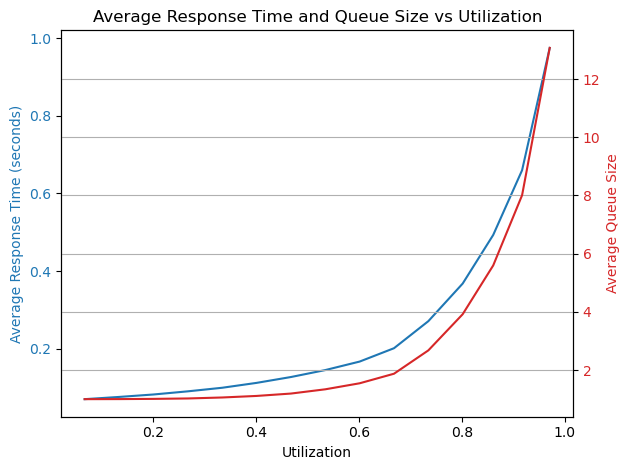

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('./data/server_log_summary.csv')
# Calculate utilization for each row
df['Utilization'] = df['TotalBusyTime'] / df['TotalTime'].replace(0, pd.NA)  # Avoid division by zero

# Plotting
fig, ax1 = plt.subplots()

# Plot Average Response Time on the left y-axis
ax1.set_xlabel('Utilization')
ax1.set_ylabel('Average Response Time (seconds)', color='tab:blue')
ax1.plot(df['Utilization'], df['AverageResponseTime'], color='tab:blue', label='Average Response Time')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create another y-axis for Average Queue Size
ax2 = ax1.twinx()
ax2.set_ylabel('Average Queue Size', color='tab:red')
ax2.plot(df['Utilization'], df['WeightedAverageQueueSize'], color='tab:red', label='Average Queue Size')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title('Average Response Time and Queue Size vs Utilization')
fig.tight_layout()  # To prevent label overlap
plt.grid(True)
plt.show()

This graph reflects closely to the theoretical properties of an M/M/1 queue. The average response time increases dramatically as the system utilization approaches 1. Thus, as utilization increases, response time rises sharply, especially when $\rho$ approaches 1 (close to full capacity). The number of requests in the queue grows without bound, as the utilization approaches 1. Thus, queue size grows exponentially as utilization increases.

-----
c) By looking at the plot produced above, can you conclude that there is some fixed proportional relationship between queue length and response time? Is there something in the theory covered so far
capable of modeling this relationship?

In an M/M/1 queue, utilization is defined as: $\rho = \frac{\lambda}{\mu}$, where $\lambda$ is the average arrival rate of requests and $\mu$ is the average service rate. 

In an M/M/1 queue, the average response time is given as: $\frac{1}{\mu - \lambda} = \frac{1}{\mu(1-\rho)}$. This reflects the relationship of where as the system utilization approaches 1, the average response time increases dramatically.

In an M/M/1 queue, the average number of items in the queue is given as: $\frac{\rho}{1-\rho}$. This reflects the relationship of where as utilization ($\rho$) approaches 1, the number of requests in the queue grows exponentially.